# ANALYSES ON INDIAN STRAT-UP ECOSYSTEM 

### BUSINESS UNDERSTANDING  

#### Project Description 

In this project, we aim to analyze the trends and patterns in startup funding received by companies in India from 2018 to 2021. The dataset consists of separate CSV files for each year from various sources and database containing details about Indias startup funding, including the startup's information, funding amounts, and investor information. Our objectives are to uncover insights into the dynamics of startup funding, identify key factors influencing funding success, and provide actionable recommendations for startups and investors in India.

#### DATA UNDERSTANDING 

#### Key Attributes in the Datasets includes:
* __Company/Brand__: Name of the company/start-up
* __Founded__: Year start-up was founded
* __Sector__: Sector of service
* __What it does__: Description about Company
* __Founders__: Founders of the Company
* __Investor__: Investors
* __Amount($)__: Raised fund
* __Stage__: Round of funding reached

#### HYPOTHESIS 
Null Hypothesis(Ho): There is no significant difference in the average funding amount between the different years.

Alternate Hypothesis(H1): There is a significant difference in the average funding amount between the different years.

#### RESEARCH QUESTIONS 

1. At what stage do most startups receive funding?
2. Which year had the highest amount of startup funding?
3. What are the top 3 sectors receiving the highest funding amounts in 2018, 2019, 2020 and 2021?
4. How does the total funding amount vary over the years?
5. What are the top 5 sectors receiving the highest funding amounts?

#### Installing and Importing Necessary Packages 

In [125]:
#importing insatlled packages 
import pyodbc 
import pandas as pd 
from dotenv import dotenv_values
import os 
import warnings 
import re
import numpy as np 
import os 
warnings.filterwarnings('ignore')

#### Loading Environment Variables and Establishing Connections 

In [7]:
#loading environment variables from .env file into a dictionary 
environment_variables  = dotenv_values('.env')

#getting the values for the credentials set up in the '.env' file
server = environment_variables.get("SERVER")
login = environment_variables.get("LOGIN") 
password = environment_variables.get("PASSWORD")
database = environment_variables.get("DATABASE")

#constructing the connection string 
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2"


In [8]:
#establishing connection using pyodbc 
connection = pyodbc.connect(connection_string)


#### Getting 2020, 2021 datasets from SQL Database and 2018, 2019 datasets from other sources 

In [9]:
# Importing Tables from Database 
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

table_2018 = pd.read_csv('C:/Users/Benedict/Downloads/startup_funding2018.csv')

table_2019 = pd.read_csv('C:/Users/Benedict/Downloads/startup_funding2019.csv')

#Executing the queries and Loading the results into pandas dataframe 

table_2020 = pd.read_sql(query_2020, connection)
table_2021 = pd.read_sql(query_2021, connection)

#### EXPLOARATORY DATA ANALYSIS (EDA)

##### Working on 2018 Dataset 

In [10]:
# Previewing 2018 Datasets 

table_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [12]:
# Exploaring Infomation on the 2018 Dataset

table_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
# Getting a Brief Description on the 2018 Datasets 

table_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


In [14]:
# Checking for Null Values in the 2018 Dataset

table_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [15]:
# Checking for Duplicates in the Dataset

table_2018.duplicated().sum()

1

In [18]:
# Droping Duplicates in the Dataset

table_2018.drop_duplicates()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [19]:
# Create a column to keep track of the year the start_ups received funding

table_2018.insert(3,"Funding_Year", 2018)

In [20]:
# Rename columns in the dataset to preferred names

table_2018.rename(columns={'Company Name': 'Company_Brand',
                        'Industry': 'Sector',
                        'Round/Series': 'Stage',
                        'Amount': 'Amount($)',
                        'Location': 'HeadQuarter',
                        'About Company': 'What_it_does'},
                        inplace=True)

# Display first 3 rows in the dataset with renamed columns

table_2018.head(3)

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2018,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,2018,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,2018,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [21]:
# Checking for Unique Characters in the STAGE column 

table_2018["Stage"].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [23]:
# Function to replace website links with np.nan

def remove_website_links(text):
    # Regular expression pattern to match website links
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    if re.search(pattern, text):
        return 'Series Unknown'
    else:
        return text

# Apply the function to the 'Stage' column
    
table_2018['Stage'] = table_2018['Stage'].apply(remove_website_links)

# Check for changes

table_2018['Stage'].unique()


array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series Unknown',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

##### Cleaning Amount Column 
from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, we got the Indian Rupee (INR) to US Dollar (USD) average exchange rate history for the year of 2018, covering 365 days of INR USD historical data.

Average exchange rate in 2018: **0.0146 USD**


In [24]:
# Remove all non-numeric characters from the 'Amount($)' column

table_2018["Amount($)"] = table_2018["Amount($)"].str.replace("$", '').str.replace(",", '').str.replace('—', '0')

def process_amount(value):
    if isinstance(value, str):
        # Check if the value starts with '₹'
        if value.startswith('₹'):
              # Remove commas from the value
            value = value.replace(',', '')
            # If the value starts with '₹', remove '₹' and convert to float
            value = float(value.replace('₹', '')) * 0.0146
    return value

# Apply the function to the 'Amount($)' column of df_2018
table_2018['Amount($)'] = table_2018['Amount($)'].apply(process_amount)

table_2018['Amount($)'] = table_2018['Amount($)'].astype(float)

In [25]:
# Getting Infomation on the Datasets after cleaning 
table_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Funding_Year   526 non-null    int64  
 4   Amount($)      526 non-null    float64
 5   HeadQuarter    526 non-null    object 
 6   What_it_does   526 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ KB


##### Working on the 2019 Dataset

In [27]:
# Previewing the 2019 Dataset 

table_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [38]:
# Getting  information about the Dataset

table_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Funding_Year   89 non-null     int64  
 8   Amount($)      89 non-null     object 
 9   Stage          43 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [29]:
# Display summary statistics of numeric columns 

table_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [30]:
# Display total number of null values per column

table_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [31]:
# Check for the total number of duplicate rows

table_2019.duplicated().sum()

0

In [37]:
table_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Funding_Year   89 non-null     int64  
 8   Amount($)      89 non-null     object 
 9   Stage          43 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [39]:
# Rename columns to preferred names

table_2019.rename(columns={'Company/Brand': 'Company_Brand',
                        'Founded': 'Year_Founded',
                        'What it does': 'What_it_does'},
                        inplace=True)

# Display first 3 rows in the dataset with renamed columns

table_2019.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,2019,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,2019,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",2019,"$28,000,000",Fresh funding


In [40]:
# For consistency, convert the Year_Founded column to integer, treating NaN values as integers

table_2019['Year_Founded'] = table_2019['Year_Founded'].astype(float).astype('Int64')

##### Cleaning Amount Column 

In [41]:
# Check for the unique values of each column

table_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [52]:
# Converting the Amount column to strind and Remove all non-numeric characters from the 'Amount($)' column
table_2019["Amount($)"] = table_2019["Amount($)"].astype(str)

table_2019["Amount($)"] = table_2019["Amount($)"].str.replace("$", '')

table_2019["Amount($)"] = table_2019["Amount($)"].str.replace(",", '')

table_2019['Amount($)'] = table_2019['Amount($)'].str.replace('Undisclosed', '0')

# Converting the Amount Column from string to Float 

table_2019['Amount($)'] = table_2019['Amount($)'].astype(float)

In [53]:
#Checking for unique Characters in HeadQuarters

table_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

##### Working on 2020 Dataset

In [55]:
# Previewing 2020 Dataset

table_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [57]:
# Getting  information about the Dataset

table_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [58]:
# Display summary statistics of numeric columns

table_2020.describe()

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


In [59]:
# Display total number of null values per column

table_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [60]:
# Check for the total number of duplicate rows

table_2020.duplicated().sum()

3

In [74]:
# Display all the duplicate rows

table_2020[table_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [75]:
# Drop duplicate rows

table_2020.drop_duplicates(inplace=True)

# Check if duplicate rows have been dropped

table_2020.duplicated().sum()

0

In [73]:
table_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Amount         799 non-null    float64
 8   Stage          590 non-null    object 
dtypes: float64(2), object(7)
memory usage: 82.2+ KB


##### I check the values in column10 and notice that its null values make up over 99% of the column. Also the other two values are the same as that of the stage column so I  drop column10 since it will not be needed 

In [77]:
print(table_2020.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


In [78]:
# Create a column to keep track of the year the start_ups received funding

table_2020.insert(7,"Funding_Year", 2020)

In [79]:
# Rename columns to preferred names
table_2020.rename(columns={'Amount': 'Amount($)',
                        'Founded': 'Year_Founded'},
                         inplace=True)

# Display first 3 rows in the dataset to view renamed columns
table_2020.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,2020,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,2020,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,2020,NaN,Pre-seed


In [80]:
table_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [81]:
# Convert the Year_Founded column to integer, treating NaN values as integers

table_2020['Year_Founded'] = table_2020['Year_Founded'].astype(float).astype('Int64')

In [82]:
# Previewing the dataset to check whether the Dtype of Funding_Year has changed to int64

table_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Year_Founded   839 non-null    Int64  
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Funding_Year   1052 non-null   int64  
 8   Amount($)      799 non-null    float64
 9   Stage          590 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(7)
memory usage: 91.4+ KB


##### Working with 2021 Dataset 

In [83]:
# Previewing the Dataset

table_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [84]:
# Display information about the Dataset 
table_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [85]:
# Display summary statistics of numeric columns

table_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [86]:
# Display total number of null values per column

table_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [87]:
# Check for the total number of duplicate rows

table_2021.duplicated().sum()

19

In [88]:
# Drop duplicate rows
table_2021.drop_duplicates(inplace=True)

# Check if duplicate rows have been dropped
table_2021.duplicated().sum()

0

In [89]:
# Create a column to keep track of the year the start_ups received funding
table_2021.insert(7,"Funding_Year", 2021)

In [91]:
# Rename columns to preferred names

table_2021.rename(columns={'Amount': 'Amount($)',
                        'Founded': 'Year_Founded'},
                         inplace=True)

# Display first 3 rows in the dataset to view renamed columns

table_2021.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",2021,"$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",2021,"$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",2021,"$30,000,000",Series D


In [93]:
# For consistency, I convert the Year_Founded column to integer, treating NaN values as integers

table_2021['Year_Founded'] = table_2021['Year_Founded'].astype(float).astype('Int64')

###### Cleaning the Stage Column 

In [94]:
table_2021["Stage"].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [95]:
# Replace missing values in the 'Stage' column with 'unknown'
table_2021['Stage'].fillna('Unknown', inplace=True)

# Filter and display values in the 'Stage' column that begin with '$
filtered_table_2021= table_2021[table_2021['Stage'].str.startswith('$')]

# Display result
filtered_table_2021

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,Upsparks,$1200000
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,2021,ah! Ventures,$300000
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",2021,"ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,None,$6000000
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,2021,"JITO Angel Network, LetsVenture",$1000000


###### I will define a function below to move the misplaced values in column 'Stage' to column 'Amount($)'.
###### Then I defined a function to strip the '$' sign as well as the ','


In [97]:
def swap_values(row):
    if isinstance(row['Stage'], str) and row['Stage'].startswith('$'):
        temp = row['Amount($)']
        row['Amount($)'] = row['Stage']
        row['Stage'] = temp
    return row

table_2021 = table_2021.apply(swap_values, axis=1)

rows_to_display = table_2021.iloc[[98, 519, 532, 655, 658]]
rows_to_display

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,$1200000,Upsparks
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,2021,$300000,ah! Ventures
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",2021,$300000,"ITO Angel Network, LetsVenture"
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,$6000000,None
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,2021,$1000000,"JITO Angel Network, LetsVenture"


In [98]:
mine = ['ah! Ventures', 'ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture']
mask = table_2021['Stage'].isin(mine)
table_2021.loc[mask, 'Investor'] = table_2021.loc[mask, 'Stage'] + ', ' + table_2021.loc[mask, 'Investor']
table_2021.loc[mask, 'Stage'] = 'Unknown'


table_2021.iloc[[98, 519, 532, 655, 658]]

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,$1200000,Upsparks
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,"ah! Ventures, Vishal Gupta",2021,$300000,Unknown
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"ITO Angel Network, LetsVenture, Omkar Pandhark...",2021,$300000,Unknown
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,$6000000,None
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"JITO Angel Network, LetsVenture, Sushil Agarwal",2021,$1000000,Unknown


##### Cleaning Amount column  

In [99]:
table_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [100]:
# Define the pattern to match 'Undisclosed' and '$Undisclosed', ignoring case

pattern = r'\$?undisclosed'

# Replace matching patterns with '0' in the 'Amount($)' column

table_2021['Amount($)'] = table_2021['Amount($)'].str.replace(pattern, '0', flags=re.IGNORECASE)

# Replace 'Undisclosed' and '$Undisclosed' with '0' regardless of case
table_2021['Amount($)'] = table_2021['Amount($)'].str.replace('Undisclosed', '0')


In [101]:
# Filter rows where values don't start with '$' and are not '0'
filtered_table_2021 = table_2021[~table_2021['Amount($)'].fillna('0').str.startswith('$') & (table_2021['Amount($)'].fillna('') != '0')]

# Display the filtered 2021 Dataset 
filtered_table_2021

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
86,Onsurity,2020,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",2021,None,Unknown
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,2021,Series C,Unknown
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,2021,Seed,Unknown
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,2021,Pre-series A,Unknown
1100,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,2021,None,Unknown
1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,2021,Seed,Unknown


In [102]:
def swap_values_stage(row):
    undisclosed_keywords = ['Series C', 'Seed', 'Pre-series A', 'Upsparks']
    if row['Amount($)'] in undisclosed_keywords:
        temp = row['Amount($)']
        row['Amount($)'] = row['Stage']
        row['Stage'] = temp
    return row

df_2021 = table_2021.apply(swap_values_stage, axis=1)

In [103]:
filtered_investors_2021 = table_2021[table_2021['Investor'].fillna('').str.startswith('$')]

filtered_investors_2021

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,2021,Series C,Unknown
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,2021,Seed,Unknown
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,2021,Pre-series A,Unknown
1100,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,2021,None,Unknown


In [105]:
indices_to_swap = [242, 257, 545]

for index in indices_to_swap:
    investor_value = table_2021.at[index, 'Investor']
    amount_value = table_2021.at[index, 'Amount($)']
    table_2021.at[index, 'Investor'] = amount_value
    table_2021.at[index, 'Amount($)'] = investor_value

In [106]:
table_2021.iloc[[237, 238, 526]]

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Series C,2021,$22000000,Unknown
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Seed,2021,$5000000,Unknown
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Pre-series A,2021,$1000000,Unknown


In [124]:

# Convert the 'Amount($)' column to string type
table_2021["Amount($)"] = table_2021["Amount($)"].astype(str)

# Remove all non-numeric characters from the 'Amount($)' column
table_2021["Amount($)"] = table_2021["Amount($)"].str.replace("$", "")
table_2021["Amount($)"] = table_2021["Amount($)"].str.replace(",", "")

# Replace 'undisclosed' with '0'
table_2021['Amount($)'] = table_2021['Amount($)'].replace('undisclosed', '0')

table_2021['Amount($)'] = table_2021['Amount($)'].replace('', '0')

table_2021['Amount($)'] = table_2021['Amount($)'].replace('Unknown', '0')

# Convert the cleaned column to float
table_2021['Amount($)'] = table_2021['Amount($)'].astype(float)


In [134]:
# Concatenate the various DataFrames into a single DataFrame
data_concat = pd.concat([table_2018, table_2019, table_2020, table_2021]).reset_index(drop=True)

# Create file path to save file
file_path = './data/startup_funding_data.csv'

# Convert dataset to CSV file and save in the path without including the index column
data_concat.to_csv(file_path, index=False)

# Read CSV file and assign it to a variable named data
data = pd.read_csv('./data/startup_funding_data.csv')

data.head(2)

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does,Year_Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2018,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,2018,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2857 non-null   object 
 1   Sector         2839 non-null   object 
 2   Stage          2348 non-null   object 
 3   Funding_Year   2857 non-null   int64  
 4   Amount($)      2602 non-null   float64
 5   HeadQuarter    2743 non-null   object 
 6   What_it_does   2857 non-null   object 
 7   Year_Founded   2088 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2232 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 223.3+ KB


In [136]:
# Checking Null Values in the various colunms 

data.isnull().sum()

Company_Brand      0
Sector            18
Stage            509
Funding_Year       0
Amount($)        255
HeadQuarter      114
What_it_does       0
Year_Founded     769
Founders         545
Investor         625
dtype: int64

In [137]:
# Getting summary on Numerical columns
data.describe()

,Funding_Year,Amount($),Year_Founded
count,2857.000000,2.602000e+03,2088.000000
mean,2020.017151,1.074683e+08,2016.067050
std,1.088223,3.245564e+09,4.368211
min,2018.000000,0.000000e+00,1963.000000
25%,2020.000000,5.000000e+05,2015.000000
50%,2020.000000,2.000000e+06,2017.000000
75%,2021.000000,1.000000e+07,2019.000000
max,2021.000000,1.500000e+11,2021.000000


In [138]:
# Checking for Duplicates 

data.duplicated().sum()

1

In [142]:
# Droping Duplicates 

data.drop_duplicates(inplace= True)

# Checking sum of Duplicates 

data.duplicated().sum()

0

In [143]:
def remove_ref(value):
    """
    Removes '#REF!' string from the input value if it's a string.        
    Returns the modified value with '#REF!' removed (if it was present), otherwise the original value.
    """
    if isinstance(value, str):
        value = value.replace('\t#REF!', '').replace('#REF!', '')
    
    return value

data = data.applymap(remove_ref)

##### Cleaning the HeadQuarter Column 

In [144]:
# maintianing first word before comma in the HeadQuarter column

data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'] = data['HeadQuarter'].str.split(',').str[0]
# data['HeadQuarter'] = data['HeadQuarter'].replace("'","",regex=True)

data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bengaluru','Bangalore').str.replace('Banglore','Bangalore')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Gurgaon','Gurugram')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Computer Games','Unknown').str.replace('Pharmaceuticals','Unknown')

In [145]:
# Previewing a row in the Dataset 

data[data['HeadQuarter']== 'Food & Beverages']

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does,Year_Founded,Founders,Investor
1903,MasterChow,Hauz Khas,Seed,2021,461000.0,Food & Beverages,A ready-to-cook Asian cuisine brand,2020.0,"Vidur Kataria, Sidhanth Madan",WEH Ventures


In [146]:
#Swapping Values 

def swap_values_sector(row):
    undisclosed_keywords = ['Food & Beverages']
    if row['HeadQuarter'] in undisclosed_keywords:
        temp = row['HeadQuarter']
        row['HeadQuarter'] = row['Sector']
        row['Sector'] = temp
    return row

data = data.apply(swap_values_sector, axis=1)

In [147]:
# Checking for Unique Values in the Sector oolumn 

data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [148]:
# maintianing first word before comma in the Sector  column

data['Sector'] = data['Sector'].apply(str)
data['Sector'] = data['Sector'].str.split(',').str[0]

# data['Sector'] = data['Sector'].replace("'","",regex=True)

data['Sector']= data['Sector'].replace('—', 'Unknown')

In [149]:
value_1 = ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

value_2 = ["MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]

value_3 = ["Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients."]

data['Sector'] = data['Sector'].replace(value_1, 'Unknown').replace(value_2, 'Unknown').replace(value_3, 'Unknown')

##### Grouping the Sector column: some entries in the sector column  have similar function which need to be grouped 

1. Technology & Software: AI startup, IoT startup, SaaS startup, Tech company, etc.

2. Finance & Banking: Encompassing Finance company, Renewable player, Blockchain startup, etc.

3. E-Commerce & Marketplace: Covering Crowdfunding, Delivery Service, B2B Supply Chain, Retail startup, etc.

4. Healthcare & Wellness: Encompassing Biopharma, Child Care, HealthTech, FemTech, etc.

5. Manufacturing & Industrial: Including Battery, Electric Vehicle, Solar Monitoring Company, etc.

6. Media & Entertainment: Covering Games, Video sharing platform, Video streaming platform, Advertisement, etc.

7. Consulting & Services: Including HR tech, Legal tech, Marketing company, Supply chain platform, etc.

8. Automotive & Transportation: Encompassing automotive_transportation, Bike Rental, etc.

9. Real Estate & Property: Covering Real Estate, Co-working Startup, Real estate, etc.

10. Other: For other industries not pecified in the above groups.

In [150]:
def group_sector(sector):
    sector = sector.lower()
    if 'tech' in sector or 'software' in sector or 'internet' in sector or 'information technology' in sector:
        return 'Technology'
    elif 'finance' in sector or 'banking' in sector or 'account' in sector or 'insurance' in sector or 'credit' in sector or 'wealth management' in sector:
        return 'Finance & Banking'
    elif 'health' in sector or 'medical' in sector or 'biotechnology' in sector or 'healthcare' in sector or 'well' in sector:
        return 'Healthcare'
    elif 'food' in sector or 'beverage' in sector or 'restaurant' in sector or 'agriculture' in sector:
        return 'Food & Agriculture'
    elif 'auto' in sector or 'transport' in sector or 'logistic' in sector:
        return 'Autommotive & Transportation'
    elif 'estate' in sector or 'property' in sector:
        return 'Real Estate & Property'
    elif 'consult' in sector or 'services' in sector:
        return 'Consulting & Services'
    elif 'commerce' in sector or 'market' in sector:
        return 'E-Commerce & Marketplace'
    else:
        return 'Other'
    
# Apply the categorization function to the 'Sector' column
    
data['Sector_group'] = data['Sector'].apply(group_sector)

# Display the updated DataFrame

data.head(10)


,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does,Year_Founded,Founders,Investor,Sector_group
0,TheCollegeFever,Brand Marketing,Seed,2018,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Seed,2018,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A,2018,949000.0,Gurugram,Leading Online Loans Marketplace in India,NaN,NaN,NaN,Finance & Banking
3,PayMe India,Financial Services,Angel,2018,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Seed,2018,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Seed,2018,1600000.0,Bangalore,Hasura is a platform that allows developers to...,NaN,NaN,NaN,Other
6,Tripshelf,Internet,Seed,2018,233600.0,Kalkaji,Tripshelf is an online market place for holida...,NaN,NaN,NaN,Technology
7,Hyperdata.IO,Market Research,Angel,2018,730000.0,Hyderabad,Hyperdata combines advanced machine learning w...,NaN,NaN,NaN,E-Commerce & Marketplace
8,Freightwalla,Information Services,Seed,2018,0.0,Mumbai,Freightwalla is an international forwarder tha...,NaN,NaN,NaN,Consulting & Services
9,Microchip Payments,Mobile Payments,Seed,2018,0.0,Bangalore,Microchip payments is a mobile-based payment a...,NaN,NaN,NaN,Other


##### Grouping the Stage column: Some entries in the stage Column have similar functions which need to be grouped 

1. Early Stage: Pre-Seed ,Seed, Pre series A, Seed funding, Seed fund, Seed round, Pre-series A, Pre-seed Round, Pre seed Round, Pre series A1, Pre-series C

2. Angel and Grants: Angel,Grant

3. Series (A-H): Series A-1, Series A, Series B, Series C, Series D, Series E, Series F, Series G, Series H, Series B+ Post series A, Series D1

4. Latter Stage: Venture -, Private Equity, Debt Financing, Post-IPO Debt, Post-IPO Equity, Corporate Round, Non-equity Assistance, Funding Round, Fresh funding, Secondary Market, PE
    
5. Unknown: Undisclosed, Venture - Series Unknown, nan,


In [151]:
# creating a function to help in the groupings 

def group_stage(stage):
    if stage in ['Pre-Seed','Seed','Early seed','Series I','Seed Round','Pre series A','Seed funding','Seed fund','Seed round','Pre-series A','Pre-series A1',
                 'Pre-seed Round','Pre seed Round','Pre series A1','Pre-series C','Pre-seed','Pre-series','Pre- series A','Pre-Series B','Seed A','Seed Funding', 'Seed Round & Series A',
                'Pre Series A','Pre seed round','Pre series B', 'Pre series C', 'Seed Investment', 'Seed+','Pre-series B']:
        return 'Early Stage'
    
    elif stage in ['Angel', 'Grant', 'Angel Round']:
        return 'Angel and Grants'
    
    elif stage in ['Series A-1', 'Series A','Seies A', 'Series A2', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
                   'Series B+', 'Post series A', 'Series D1','Series B2', 'Series E2', 'Series C, D', 'Series F2', 'Series F1', 'Series A+', 'Series B3']:
        return 'Series (A-H)'
    
    elif stage in ['Venture -', 'Private Equity','Debt' ,'Debt Financing', 'Post-IPO Debt', 'Post-IPO Equity',
                   'Corporate Round', 'Non-equity Assistance', 'Funding Round', 'Fresh funding', 'Secondary Market',
                   'PE','Bridge', 'Edge', 'Bridge Round', 'Mid series']:
        return 'Latter Stage'
    
    elif stage in ['Undisclosed','Venture - Series Unknown', 'Upsparks', 'Series Unknown']:
        return 'Unknown'

    else:
        return stage
    

#Apply the function to the 'Stage' column
    
data['Stage'] = data['Stage'].apply(group_stage)

# Display the updated DataFrame

data.head()

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does,Year_Founded,Founders,Investor,Sector_group
0,TheCollegeFever,Brand Marketing,Early Stage,2018,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,2018,584000.0,Mumbai,A startup which aggregates milk from dairy far...,NaN,NaN,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series (A-H),2018,949000.0,Gurugram,Leading Online Loans Marketplace in India,NaN,NaN,NaN,Finance & Banking
3,PayMe India,Financial Services,Angel and Grants,2018,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,2018,0.0,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,E-Commerce & Marketplace


In [152]:
#Droping Column not needed for Analysis 

data = data.drop(columns={'What_it_does','Founders','Investor'}, axis=1)
data.head(2)

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded,Sector_group
0,TheCollegeFever,Brand Marketing,Early Stage,2018,250000.0,Bangalore,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,2018,584000.0,Mumbai,NaN,Food & Agriculture


In [153]:
# Checking for Null values

data.isna().sum()

Company_Brand      0
Sector             0
Stage            509
Funding_Year       0
Amount($)        255
HeadQuarter        0
Year_Founded     768
Sector_group       0
dtype: int64

In [154]:
# Dealing with the Null Values 

data['Stage'].fillna('Unknown', inplace=True)

In [155]:
# Replace 0.0 values with NaN

data['Amount($)'].replace(0.0, np.nan, inplace=True)

data['Amount($)'].fillna(data['Amount($)'].mean(), inplace=True)

data['Amount($)'] = data['Amount($)'].apply(lambda x: f'{x:.2f}')

# Clean 'Amount($)' column and convert to numeric dtype
data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce')


In [156]:
# Filling the Year_Founded Columns with Unknwon 

data['Year_Founded'].fillna('Unknown', inplace=True)

In [157]:
# Previewing the data
data.head()

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded,Sector_group
0,TheCollegeFever,Brand Marketing,Early Stage,2018,2.500000e+05,Bangalore,Unknown,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,2018,5.840000e+05,Mumbai,Unknown,Food & Agriculture
2,MyLoanCare,Credit,Series (A-H),2018,9.490000e+05,Gurugram,Unknown,Finance & Banking
3,PayMe India,Financial Services,Angel and Grants,2018,2.000000e+06,Noida,Unknown,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,2018,1.215264e+08,Hyderabad,Unknown,E-Commerce & Marketplace


In [158]:
# define a function to print unique 

def unique_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Column: {column}")
            # print(f"------------------------")
            column_unique = df[column].unique()
            print(f"{column_unique}")

unique_values(data)

Column: Company_Brand
['TheCollegeFever' 'Happy Cow Dairy' 'MyLoanCare' ... 'Cogos Technologies'
 'Vahdam' 'WeRize']
Column: Sector
['Brand Marketing' 'Agriculture' 'Credit' 'Financial Services'
 'E-Commerce Platforms' 'Cloud Infrastructure' 'Internet'
 'Market Research' 'Information Services' 'Mobile Payments' 'B2B' 'Apps'
 'Food Delivery' 'Industrial Automation' 'Automotive' 'Finance'
 'Accounting' 'Artificial Intelligence' 'Internet of Things'
 'Air Transportation' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software' 'Logistics' 'Insurance' 'Information Technology'
 'Blockchain' 'Education' 'E-Commerce' 'Renewable Energy' 'E-Learning'
 'Clean Energy' 'Transportation' 'Fitness' 'Hospitality'
 'Media and Entertainment' 'Broadcasting' 'EdTech' 'Health Care' 'Unknown'
 'Sports' 'Big Data' 'Cloud Computing' 'Food Processing'
 'Trading Platform' 'Consumer Goods' 'Wellness' 'Fashion' 'Consulting'
 'Biotechnology' 'Communities' 'Consumer' 'Consumer Applications' 'Mobile'
 'Adver

In [159]:
# Getting a brief summary on the dataset

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2856,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2856,591,FinTech,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2856,5,Early Stage,1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,2856.0,NaN,NaN,NaN,2020.017857,1.087759,2018.0,2020.0,2020.0,2021.0,2021.0
Amount($),2856.0,NaN,NaN,NaN,121526423.720448,3097606045.179614,876.0,1000000.0,5200000.0,85250000.0,150000000000.0
HeadQuarter,2856,128,Bangalore,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Founded,2856,35,Unknown,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector_group,2856,9,Other,1086,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ANSWERING RESEARCH QUESTIONS 

##### Q1. At what stage does most start-up receive funding 

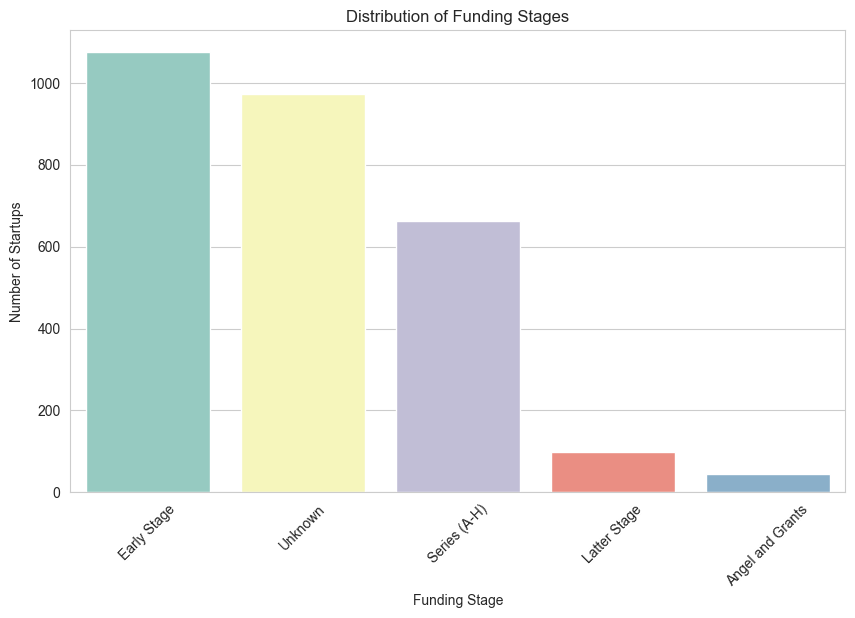

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style

sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Stage', palette='Set3', order=data['Stage'].value_counts().index)
plt.title('Distribution of Funding Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

##### Q2. How does the total funding amount vary over the years?

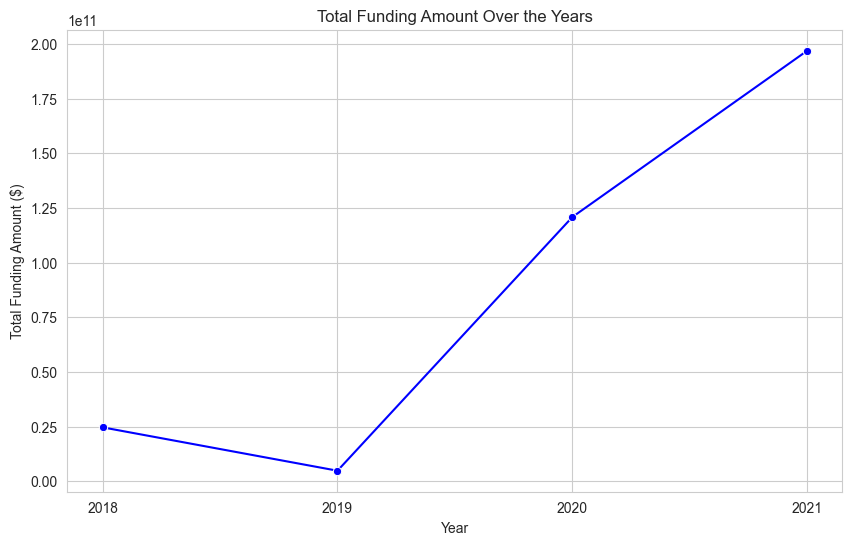

In [178]:

import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Funding_Year' and sum the 'Amount($)' for each year
total_funding_by_year = data.groupby('Funding_Year')['Amount($)'].sum().reset_index()

# Set the style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_funding_by_year, x='Funding_Year', y='Amount($)', marker='o', color='blue')
plt.title('Total Funding Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(total_funding_by_year['Funding_Year'])  # Ensure all years are displayed on the x-axis
plt.grid(True)
plt.show()

##### Q3. What are the top 3 sectors receiving the highest funding amounts in 2018, 2019, 2020 and 2021?

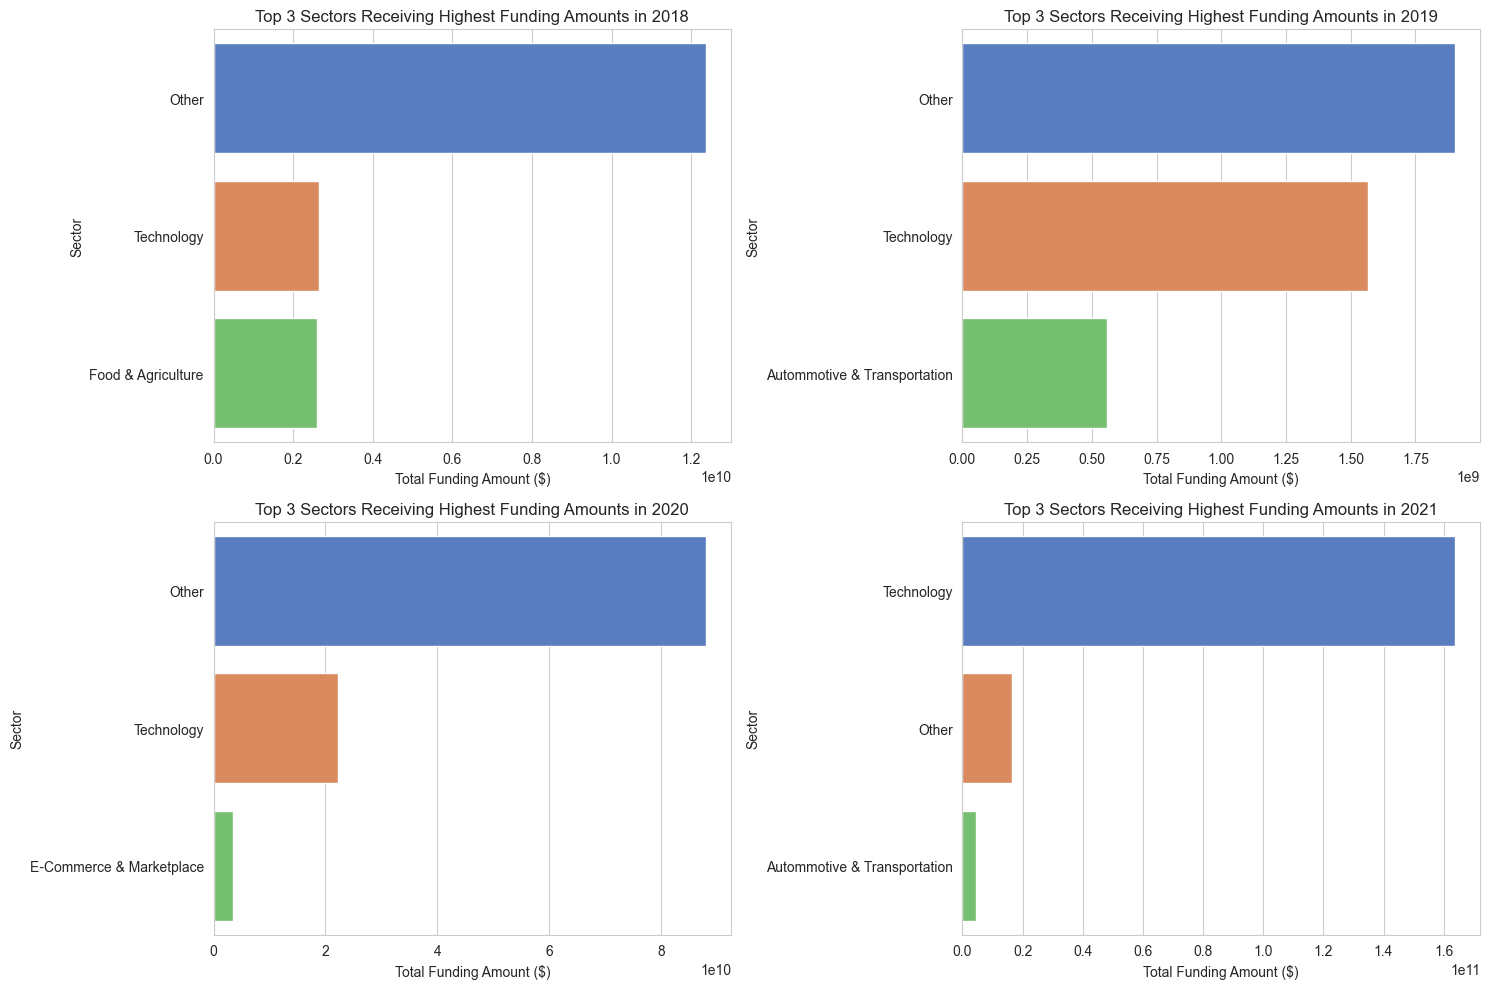

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list to store the top 3 sectors for each year
top_3_sectors_by_year = []

# Iterate through each year
for year in [2018, 2019, 2020, 2021]:
    # Filter the data for the current year
    year_data = data[data['Funding_Year'] == year]
    
    # Aggregate the funding amounts by sector and sum the amounts
    sector_funding = year_data.groupby('Sector_group')['Amount($)'].sum().reset_index()
    
    # Sort the sectors based on total funding amounts in descending order
    sector_funding_sorted = sector_funding.sort_values(by='Amount($)', ascending=False)
    
    # Get the top 3 sectors
    top_3_sectors = sector_funding_sorted.head(3)


  # Append the top 3 sectors to the list
    top_3_sectors_by_year.append(top_3_sectors)

# Visualize the top 3 sectors for each year
plt.figure(figsize=(15, 10))

for i, year in enumerate([2018, 2019, 2020, 2021]):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=top_3_sectors_by_year[i], x='Amount($)', y='Sector_group', palette='muted')
    plt.title(f'Top 3 Sectors Receiving Highest Funding Amounts in {year}')
    plt.xlabel('Total Funding Amount ($)')
    plt.ylabel('Sector')

plt.tight_layout()
plt.show()


##### Q4. What are the top 5 sectors receiving the highest funding?

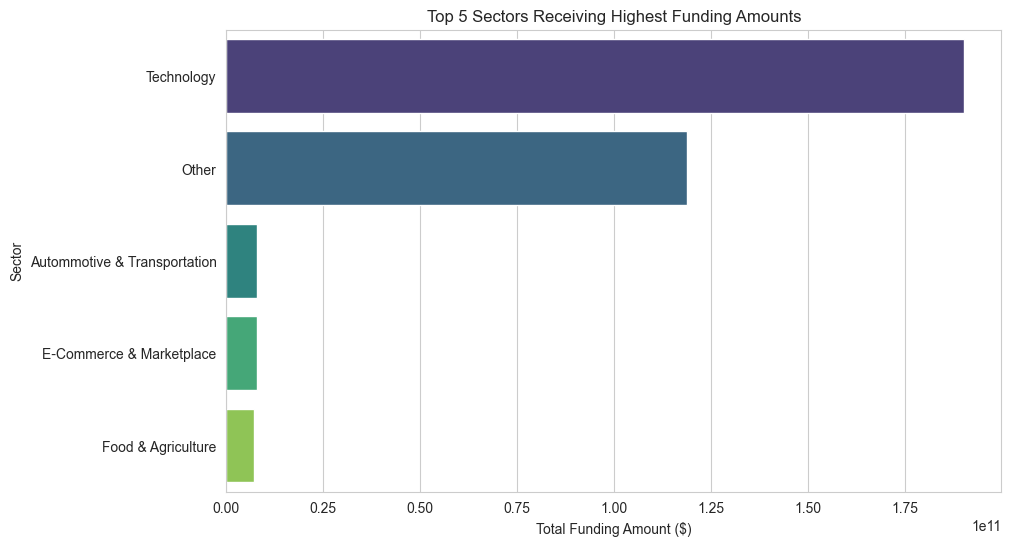

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the data by sector and sum the funding amounts
sector_funding = data.groupby('Sector_group')['Amount($)'].sum().reset_index()

# Sort the sectors based on total funding amounts in descending order
sector_funding_sorted = sector_funding.sort_values(by='Amount($)', ascending=False)

# Get the top 5 sectors
top_5_sectors = sector_funding_sorted.head(5)

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_sectors, x='Amount($)', y='Sector_group', palette='viridis')
plt.title('Top 5 Sectors Receiving Highest Funding Amounts')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector')
plt.show()

#### HYPOTHESIS TESTING 

##### Null Hypothesis (H0): There is no significant difference in the average funding amount between the different years.
##### Alternative Hypothesis (H1): There is a significant difference in the average funding amount between the different years.

In [180]:
# PERFORMING AN ANOVA TEST 

from scipy.stats import f_oneway

# Subset the data for each year
funding_2018 = data[data['Funding_Year'] == 2018]['Amount($)']
funding_2019 = data[data['Funding_Year'] == 2019]['Amount($)']
funding_2020 = data[data['Funding_Year'] == 2020]['Amount($)']
funding_2021 = data[data['Funding_Year'] == 2021]['Amount($)']

# Perform ANOVA test
f_statistic, p_value = f_oneway(funding_2018, funding_2019, funding_2020, funding_2021)

# Set significance level (alpha)
alpha = 0.05

# Print results
print("ANOVA test results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check for significance
if p_value < alpha:

    print("Reject the null hypothesis: There is a significant difference in the average funding amount between different years.")
    
else:

    print("Fail to reject the null hypothesis: There is no significant difference in the average funding amount between different years.")

ANOVA test results:
F-statistic: 0.1968652981765094
P-value: 0.8985721446197061
Fail to reject the null hypothesis: There is no significant difference in the average funding amount between different years.


In [183]:
# EXPORTING DATAFRAME TO CSV FILE FOR POWER BI VISUALISATION 

data.to_csv('LP1_datasets.csv')